In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import norm, binom
import matplotlib.pyplot as plt
from math import sqrt


In [3]:
#Functions:

def bin(n, p, a, b, x1, x2):
    array1 = np.arange(a, b, 1/20)
    array2 = np.arange(a, b, 1)
    
    plt.figure(figsize = (10, 5))
    plt.bar(array2, binom.pmf(array2, n, p), width=1, align="center", fill=False)
    plt.plot(array1, norm.pdf(array1, n*p, sqrt(n*p*(1-p))), color = 'b')
    plt.xticks(array2, rotation=55)
    plt.ylim(0,0.085)
    
    section = np.arange(x1, x2, 1)
    plt.fill_between(section, norm.pdf(section, n*p, sqrt(n*p*(1-p))), color='red')  #any color that you like.
    plt.show()
    
    
def normal(mean, sd, a, b, x1, x2):
    array = np.arange(a, b, 1/20)
    
    plt.figure(figsize = (10,5))
    plt.plot(array, norm.pdf(array, mean, sd), color='b')
    plt.ylim(0, 0.085)
    plt.xticks(range(a, b), rotation = 55)
    
    section = np.arange(x1, x2, 0.5)
    plt.fill_between(section, norm.pdf(section, mean, sd), color='red')
    plt.show()


Using X ~ Bin(100, 0.5) , P(45<= X <=55)
0.728746975926
Using X ~ N(100 * 0.5, 100 * 0.25), P(45<= X <=55)
0.682689492137
Applying Continuity Correction
0.728667878107


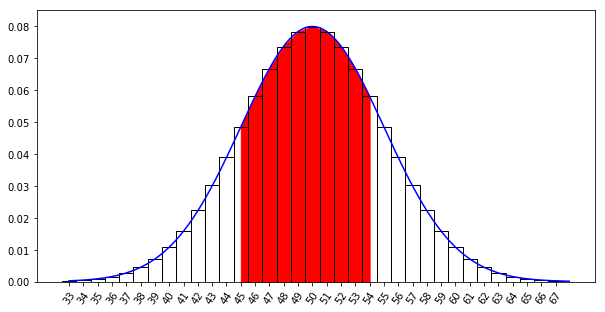

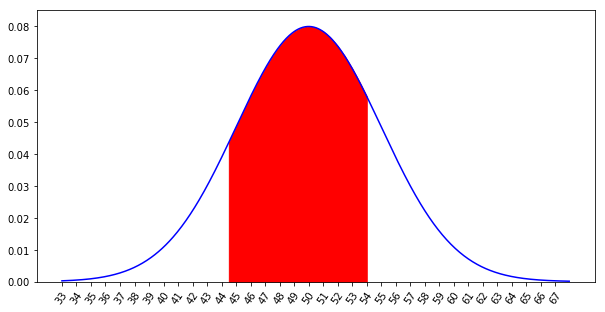

In [4]:
# X ~ Bin(100, 0.5)
# X ~ N(50, sd = 5)
# P(45 <= X <= 55)

print('Using X ~ Bin(100, 0.5) , P(45<= X <=55)')
print(binom.cdf(55, 100, 0.5) - binom.cdf(44, 100, 0.5))

print('Using X ~ N(100 * 0.5, 100 * 0.25), P(45<= X <=55)')
print(norm.cdf(55, 50, 5) - norm.cdf(45, 50, 5))

print('Applying Continuity Correction')
print(norm.cdf(55.5, 50, 5) - norm.cdf(44.5, 50, 5))

bin(100, 0.5, 33, 68, 45, 55)
normal(50, 5, 33, 68, 44.5, 54.5)

Using X ~ Bin(100, 0.5) , P(X >= 60)
0.0284439668205
Using X ~ N(100 * 0.5, 100 * 0.25), P(X >= 60)
0.0227501319482
Applying Continuity Correction
0.028716559816


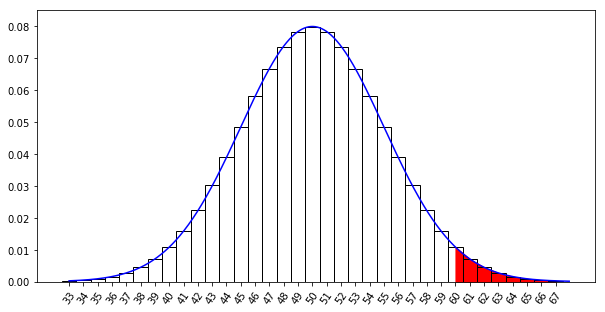

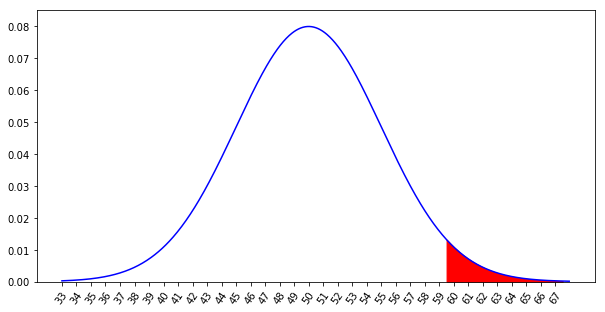

In [18]:
# X ~ Bin(100, 0.5)
# X ~ N(50, sd = 5)
#P( X >= 60)

print('Using X ~ Bin(100, 0.5) , P(X >= 60)')
print(1 - binom.cdf(59, 100, 0.5))

print('Using X ~ N(100 * 0.5, 100 * 0.25), P(X >= 60)')
print(norm.sf(60, 50, 5))

print('Applying Continuity Correction')
print(norm.sf(59.5, 50, 5))

bin(100, 0.5, 33, 68, 60, 68)
normal(50, 5, 33, 68, 59.5, 68)

Using X ~ Bin(100, 0.2) , P(X > 28)
0.0200202067322
Using X ~ N(100 * 0.2, 100 * 0.16), P(X > 28)
0.0227501319482
Applying Continuity Correction
0.0167933064484


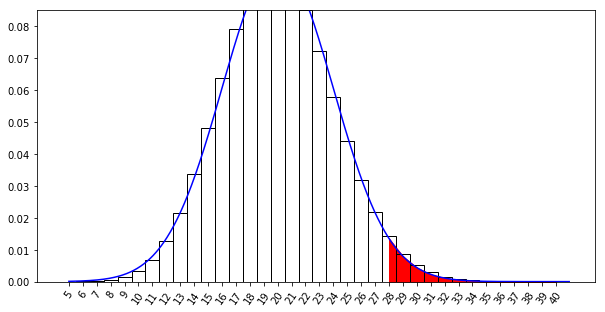

In [19]:
# X ~ Bin(100, 0.2)
# X ~ N(20, sd = 4)
#P( X > 28)

print('Using X ~ Bin(100, 0.2) , P(X > 28)')
print(1 - binom.cdf(28, 100, 0.2))

print('Using X ~ N(100 * 0.2, 100 * 0.16), P(X > 28)')
print(norm.sf(28, 20, 4))

print('Applying Continuity Correction')
print(norm.sf(28.5, 20, 4))

    
bin(100, 0.2, 5, 41, 28, 41)
#normal(20, 4, 5, 41, 28.5, 41)

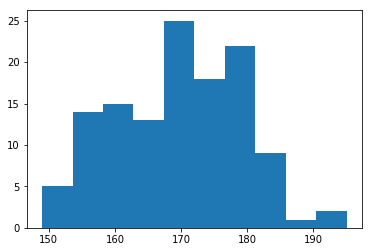

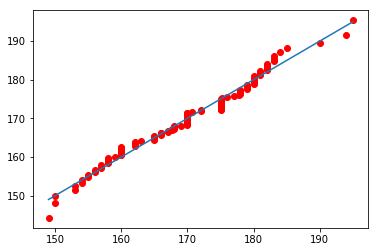

In [20]:
import pandas as pd

def normality_check(data):
    pos =[]
    th_Q=[]
    data = np.sort(np.array(data))
    pos = [i for i in range(1, len(data) + 1)]
    th_Q = [norm.ppf((i - 0.5)/len(data), np.mean(data), np.std(data, ddof = 1)) for i in pos]
    plt.plot(data, th_Q, 'ro', data, data)
    plt.show()

ds = pd.read_csv('Cleaned.csv')
plt.hist(ds.Height)
plt.show()
normality_check(ds.Height)